In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
df= pd.read_csv("C:/Users/Paa Kwasi/Desktop/well Logs/Selects/3402920648 Frank Murray #3.csv")

In [26]:
df.columns

Index(['DEPT', 'NPHI', 'RHOB2', 'GR2', 'M_DEPTH', 'CAL', 'GR', 'RHOB', 'CALI',
       'DT'],
      dtype='object')

In [27]:
df.drop(['RHOB2', 'GR2', 'M_DEPTH', 'CAL','CALI'],axis=1,inplace=True)

In [28]:
nw=pd.read_csv("C:/Users/Paa Kwasi/Desktop/well Logs/Selects/3403122053 EDWIN L. LEE #1.csv")

In [29]:
sorted(df.columns)==sorted(nw.columns)

True

In [33]:
df.describe()

,DEPT,NPHI,GR,RHOB,DT
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000
mean,9415.000000,0.000234,52.896981,2.749716,49.971852
std,467.870219,0.000160,29.925460,0.091954,5.220370
min,8605.000000,0.000000,11.200000,2.449000,40.447000
25%,9010.000000,0.000100,32.600000,2.734900,46.180000
50%,9415.000000,0.000200,47.742500,2.773000,47.733000
75%,9820.000000,0.000300,64.993100,2.805000,52.782000
max,10225.000000,0.001100,209.400000,2.954000,86.657000


<AxesSubplot:>

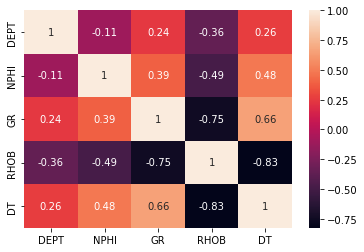

In [31]:
sns.heatmap(df.corr(),annot=True)

In [35]:
X=df.drop(['RHOB'],axis=1)
y=df["RHOB"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y)
lr=LinearRegression().fit(X_train,y_train)
lr.score(X_train,y_train)

0.7865855125904017

In [38]:
lr.score(X_test,y_test)

0.7768455154727564

In [43]:
mse_test=[]
train_score=[]
test_score=[]
test_well_score=[]
mse_train=[]
random_state=[x for x in range(100)]
for i in random_state:
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LinearRegression
    X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=i)
    lr=LinearRegression().fit(X_train,y_train)
    lr.score(X_train,y_train)
    from sklearn.metrics import mean_squared_error
    train_score.append(lr.score(X_train,y_train))
    test_score.append(lr.score(X_test,y_test))
    mse_train.append(mean_squared_error(lr.predict(X_train),y_train))
    mse_test.append(mean_squared_error(lr.predict(X_test),y_test))
    df1=pd.DataFrame(train_score, columns=['Train_score'])
    df2=pd.DataFrame(test_score, columns=['Test_score'])
    df4=pd.DataFrame(mse_train, columns=['Train_error'])
    df5=pd.DataFrame(mse_test, columns=['Test_error'])
    df=pd.merge(df1,df2,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df4,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df5,'outer', left_index=True,right_index=True)
    

In [44]:
df

,Train_score,Test_score,Train_error,Test_error
0,0.776994,0.802959,0.001826,0.001814
1,0.788238,0.773424,0.001776,0.001960
2,0.777321,0.804483,0.001865,0.001698
3,0.787136,0.773444,0.001796,0.001923
4,0.788887,0.770206,0.001800,0.001891
...,...,...,...,...
95,0.777610,0.799354,0.001807,0.001876
96,0.787268,0.775044,0.001805,0.001878
97,0.776526,0.808918,0.001917,0.001540
98,0.782959,0.787862,0.001862,0.001712


In [45]:
mse_test=[]
train_score=[]
test_score=[]
test_well_score=[]
mse_train=[]
random_state=[x for x in range(100)]
for i in random_state:
    from sklearn.preprocessing import MinMaxScaler
    from xgboost import XGBRegressor
    X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=i)
    lr=XGBRegressor().fit(X_train,y_train)
    lr.score(X_train,y_train)
    from sklearn.metrics import mean_squared_error
    train_score.append(lr.score(X_train,y_train))
    test_score.append(lr.score(X_test,y_test))
    mse_train.append(mean_squared_error(lr.predict(X_train),y_train))
    mse_test.append(mean_squared_error(lr.predict(X_test),y_test))
    df1=pd.DataFrame(train_score, columns=['Train_score'])
    df2=pd.DataFrame(test_score, columns=['Test_score'])
    df4=pd.DataFrame(mse_train, columns=['Train_error'])
    df5=pd.DataFrame(mse_test, columns=['Test_error'])
    df=pd.merge(df1,df2,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df4,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df5,'outer', left_index=True,right_index=True)
    

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future ver

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pa

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pa

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pa

In [46]:
df

,Train_score,Test_score,Train_error,Test_error
0,0.993681,0.951191,0.000052,0.000449
1,0.993921,0.941964,0.000051,0.000502
2,0.994037,0.947399,0.000050,0.000457
3,0.992783,0.941717,0.000061,0.000495
4,0.994074,0.946713,0.000051,0.000438
...,...,...,...,...
95,0.993298,0.954100,0.000054,0.000429
96,0.993901,0.944450,0.000052,0.000464
97,0.992865,0.945821,0.000061,0.000437
98,0.993752,0.949034,0.000054,0.000411


In [47]:
mse_test=[]
train_score=[]
test_score=[]
test_well_score=[]
mse_train=[]
random_state=[x for x in range(100)]
for i in random_state:
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.svm import SVR
    X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=i)
    lr=SVR().fit(X_train,y_train)
    lr.score(X_train,y_train)
    from sklearn.metrics import mean_squared_error
    train_score.append(lr.score(X_train,y_train))
    test_score.append(lr.score(X_test,y_test))
    mse_train.append(mean_squared_error(lr.predict(X_train),y_train))
    mse_test.append(mean_squared_error(lr.predict(X_test),y_test))
    df1=pd.DataFrame(train_score, columns=['Train_score'])
    df2=pd.DataFrame(test_score, columns=['Test_score'])
    df4=pd.DataFrame(mse_train, columns=['Train_error'])
    df5=pd.DataFrame(mse_test, columns=['Test_error'])
    df=pd.merge(df1,df2,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df4,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df5,'outer', left_index=True,right_index=True)
    